<a href="https://colab.research.google.com/github/JohnSRX/Machine-Learning-Portfolio/blob/Regression/Polynomial_Regression_rev2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('brooklyn_listings.csv')

In [ ]:
df.head(15)

,Unnamed: 0,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,1,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
1,2,1020000.0,3,1,NaN,Park Slope,sold,"411 15th St #K, Brooklyn, NY 11215"
2,3,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #D, Brooklyn, NY 11217"
3,4,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #E, Brooklyn, NY 11217"
4,5,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"
5,6,1270000.0,2,1,NaN,Park Slope,sold,"509 2nd St #1R, Brooklyn, NY 11215"
6,7,2600000.0,5,4,3600.0,Park Slope,sold,"645 Carroll St, Brooklyn, NY 11215"
7,8,4050000.0,4,4,3600.0,Park Slope,sold,"538 9th St #4, Brooklyn, NY 11215"
8,9,2400000.0,3,3,1428.0,Park Slope,sold,"910 Union St #7A, Brooklyn, NY 11215"
9,10,750000.0,1,1,566.0,Park Slope,sold,"180 Sterling Pl #15, Brooklyn, NY 11217"


In [ ]:
#we're going to estimate the price(target) with sqft, bathroom, and bedrooms(features)
df = df[['price','bathrooms','sqft']].dropna()

In [ ]:
df.head(10)

,price,bathrooms,sqft
0,4100000.0,5,2940.0
4,908000.0,1,1066.0
6,2600000.0,4,3600.0
7,4050000.0,4,3600.0
8,2400000.0,3,1428.0
9,750000.0,1,566.0
10,4296390.0,3,2688.0
12,2960000.0,3,1604.0
13,4250000.0,1,4780.0
17,3950000.0,4,3072.0


In [ ]:

# seperate the target(y) and features(x)
x_values = df[['bathrooms','sqft']].values
y_values = df['price'].values

print(x_values[0], y_values[0])

[   5. 2940.] 4100000.0


In [ ]:
#define our polynomial model, let's try 2
degree=2


In [ ]:
# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree (2)
poly_model = PolynomialFeatures(2)

In [ ]:
# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_values)

In [ ]:

print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')


initial values [   5. 2940.]
Mapped to [1.0000e+00 5.0000e+00 2.9400e+03 2.5000e+01 1.4700e+04 8.6436e+06]


In [ ]:
# fit the model
poly_model.fit(poly_x_values, y_values)

PolynomialFeatures()

In [ ]:
# Linear regression here is the base 
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

LinearRegression()

In [ ]:

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_


array([ 0.00000000e+00,  2.59473994e+05,  1.11386271e+02, -2.32783297e+02,
       -2.80878108e+00, -2.50166631e-04])

In [ ]:
mean_squared_error(y_values, y_pred, squared=False)

1136272.6751522145

In [ ]:
# check the accuracy for each degree, the lower the error the better
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
   

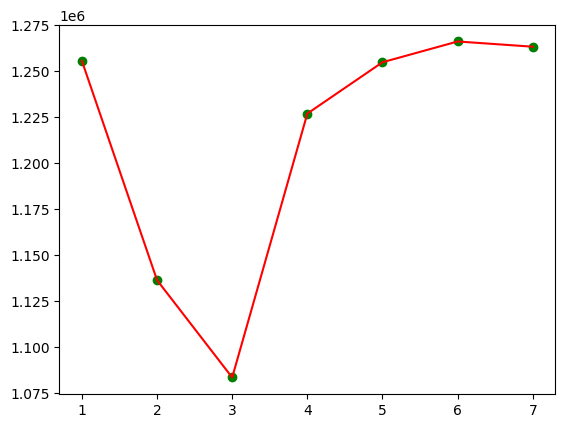

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 